<a href="https://colab.research.google.com/github/devmj092/DL-P1/blob/main/DL_project_1_Critical_heat_flux_by_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset Overview

The dataset consists of measurements taken from experiments. Each data point includes the following features:

1. **Pressure [MPa]**: The pressure in megapascals.
2. **Mass Flux [kg/m2-s]**: The mass flux in kilograms per square meter per second.
3. **x_e_out [-]**: The exit quality (target variable).
4. **D_e [mm]**: Diameter of the tube.
5. **D_h [mm]**: Hydraulic diameter.
6. **Length [mm]**: Length of the tube.
7. **chf_exp [MW/m2]**: Critical heat flux in megawatts per square meter.

### Objective

The main goal is to predict the exit quality (`x_e_out [-]`) based on the provided features using a deep learning model.







In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam



In [2]:
from google.colab import drive
drive. mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Data_CHF_Zhao_2020_ATE (1).csv"
df= pd.read_csv(path)

In [5]:
df

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,1,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,2,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,3,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,4,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,5,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0
...,...,...,...,...,...,...,...,...,...,...
1860,1861,Richenderfer,plate,1.01,1500,-0.0218,15.0,120.0,10,9.4
1861,1862,Richenderfer,plate,1.01,1500,-0.0434,15.0,120.0,10,10.4
1862,1863,Richenderfer,plate,1.01,2000,-0.0109,15.0,120.0,10,10.8
1863,1864,Richenderfer,plate,1.01,2000,-0.0218,15.0,120.0,10,10.9


In [8]:
df=df.drop(['id'], axis=1)

In [9]:
df

,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0
...,...,...,...,...,...,...,...,...,...
1860,Richenderfer,plate,1.01,1500,-0.0218,15.0,120.0,10,9.4
1861,Richenderfer,plate,1.01,1500,-0.0434,15.0,120.0,10,10.4
1862,Richenderfer,plate,1.01,2000,-0.0109,15.0,120.0,10,10.8
1863,Richenderfer,plate,1.01,2000,-0.0218,15.0,120.0,10,10.9


<h2>EDA</h2>

In [12]:
df.isna().sum()

author                 0
geometry               0
pressure [MPa]         0
mass_flux [kg/m2-s]    0
x_e_out [-]            0
D_e [mm]               0
D_h [mm]               0
length [mm]            0
chf_exp [MW/m2]        0
dtype: int64

            author     geometry  pressure [MPa]  mass_flux [kg/m2-s]  \
count  1865.000000  1865.000000     1865.000000          1865.000000   
mean      5.980161     1.568901       10.010949          2862.647721   
std       2.312527     0.806823        4.282715          1656.412247   
min       0.000000     0.000000        0.100000             0.000000   
25%       7.000000     2.000000        6.890000          1519.000000   
50%       7.000000     2.000000       10.340000          2590.000000   
75%       7.000000     2.000000       13.790000          3933.000000   
max       9.000000     2.000000       20.680000          7975.000000   

       x_e_out [-]     D_e [mm]     D_h [mm]  length [mm]  chf_exp [MW/m2]  
count  1865.000000  1865.000000  1865.000000  1865.000000      1865.000000  
mean      0.016179     9.417212    16.167721   911.340483         3.854638  
std       0.117575     6.333807    21.182870   726.718974         1.985535  
min      -0.866700     1.000000     1.00000

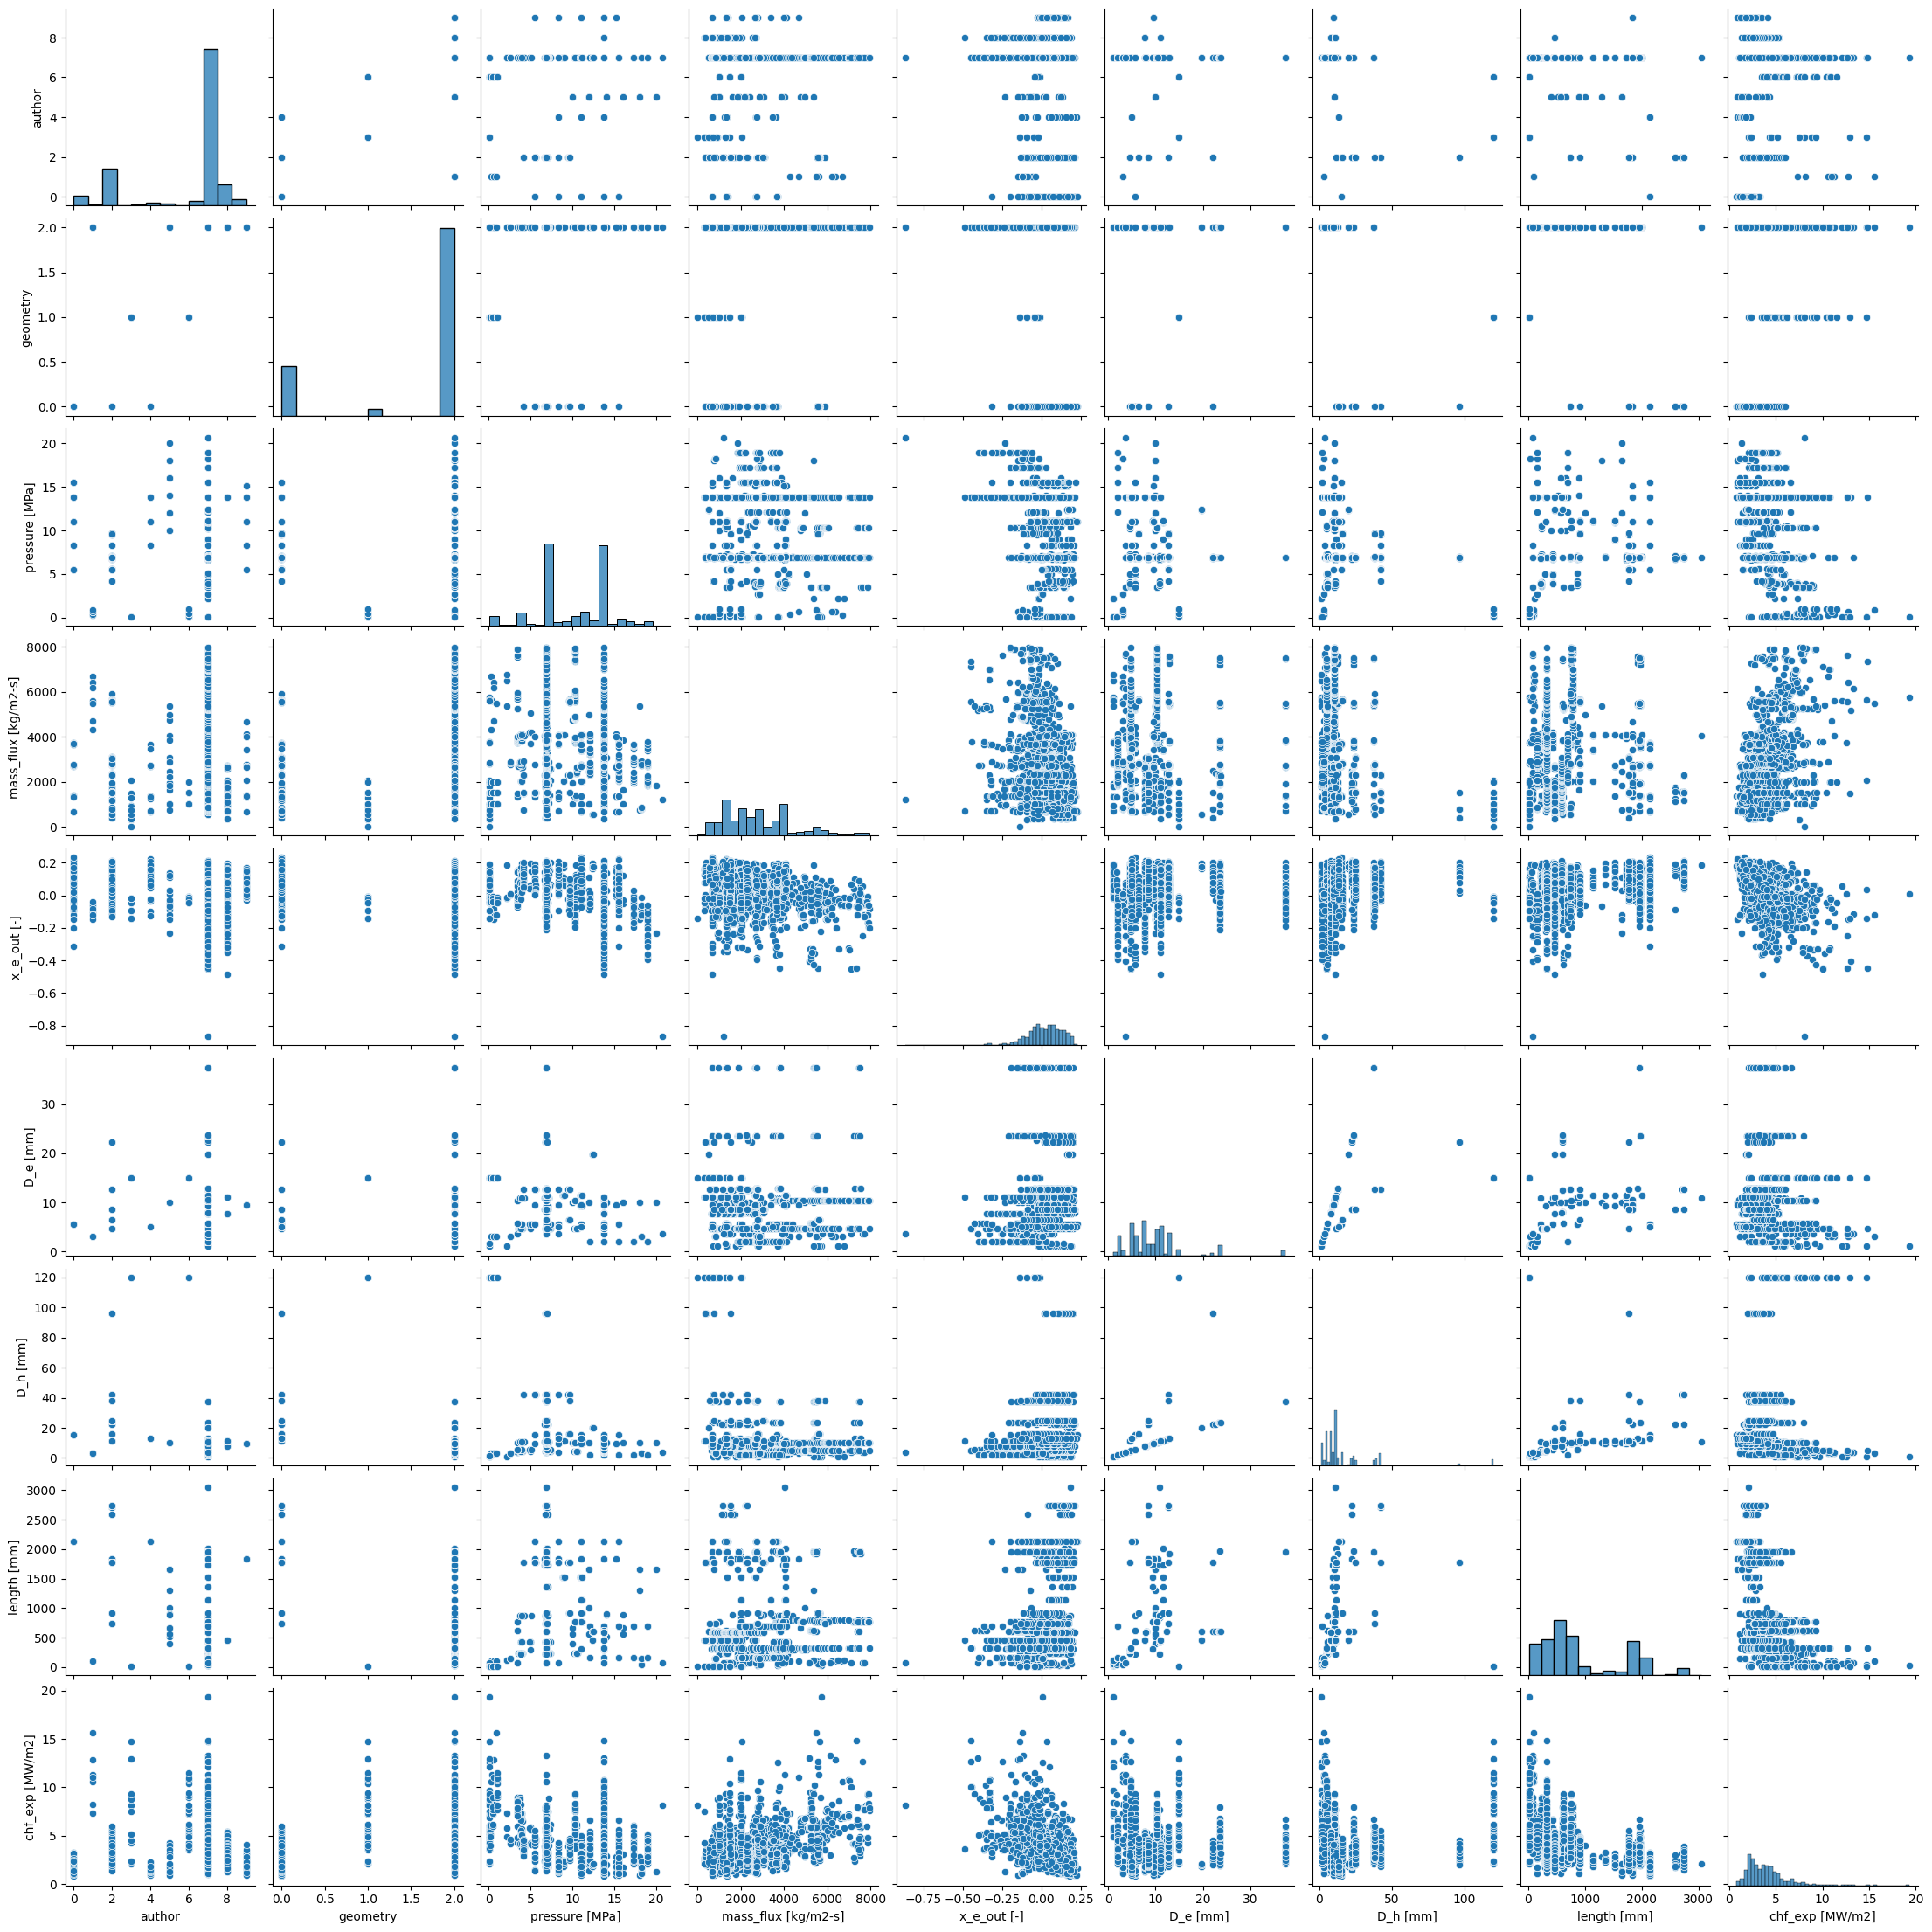

In [35]:
print(df.describe())
sns.pairplot(df)
plt.show()

In [21]:
df.describe()

,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
count,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000
mean,10.010949,2862.647721,0.016179,9.417212,16.167721,911.340483,3.854638
std,4.282715,1656.412247,0.117575,6.333807,21.182870,726.718974,1.985535
min,0.100000,0.000000,-0.866700,1.000000,1.000000,10.000000,0.800000
25%,6.890000,1519.000000,-0.048300,5.600000,5.600000,432.000000,2.400000
50%,10.340000,2590.000000,0.024400,8.500000,10.300000,625.000000,3.500000
75%,13.790000,3933.000000,0.100600,11.100000,15.200000,1778.000000,4.800000
max,20.680000,7975.000000,0.232000,37.500000,120.000000,3048.000000,19.300000


In [10]:
df['author'].unique()

array(['Inasaka', 'Peskov', 'Thompson', 'Weatherhead', 'Williams', 'Beus',
       'Janssen', 'Mortimore', 'Kossolapov', 'Richenderfer'], dtype=object)

In [11]:
df['geometry'].unique()

array(['tube', 'annulus', 'plate'], dtype=object)

In [25]:
df['author'].value_counts()

author
Thompson        1202
Janssen          282
Weatherhead      162
Beus              77
Williams          51
Richenderfer      36
Mortimore         19
Peskov            17
Kossolapov        12
Inasaka            7
Name: count, dtype: int64

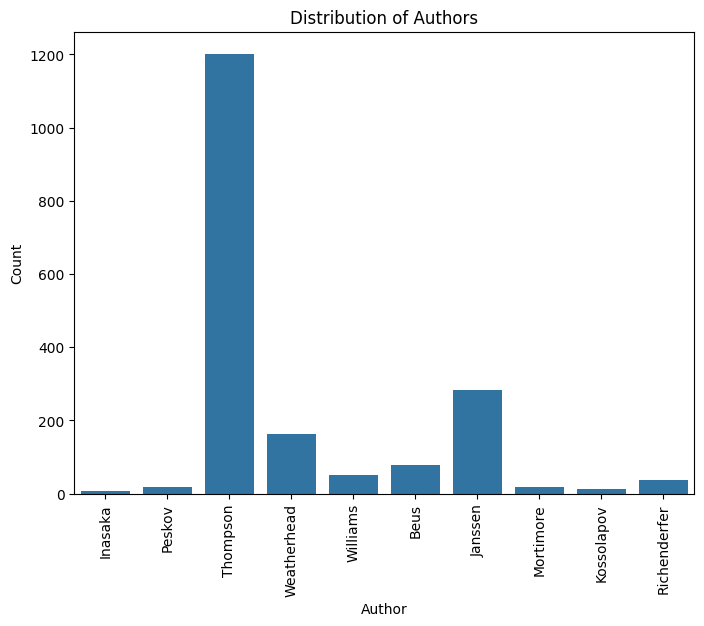

In [16]:
# Plot the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="author")
plt.title("Distribution of Authors")
plt.xlabel("Author")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [26]:
df['geometry'].value_counts()

geometry
tube       1439
annulus     378
plate        48
Name: count, dtype: int64

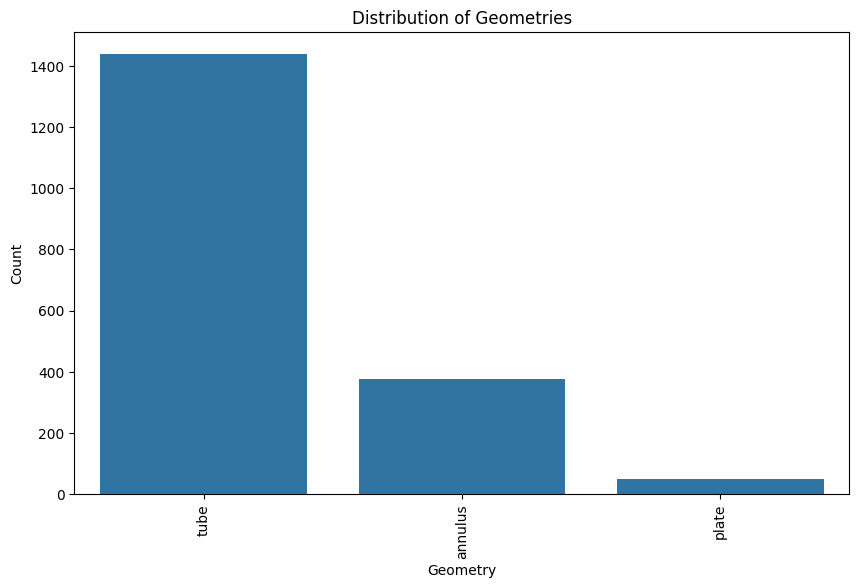

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="geometry")
plt.title("Distribution of Geometries")
plt.xlabel("Geometry")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

📌Results: <br>
After visualizing It is crystal clear that most of experiments were carried in tube geometry.

In [28]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoding to 'author' and 'geometry' columns
label_encoder = LabelEncoder()
df['author'] = label_encoder.fit_transform(df['author'])
df['geometry'] = label_encoder.fit_transform(df['geometry'])

<h2>Applying Deep Learning model

In [29]:
# Split the data into features and target variable
X = df.drop('x_e_out [-]', axis=1)
y = df['x_e_out [-]']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)

# Calculate the metrics
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)
print("Mean Square Error:",mse)
print("Root Mean Square Error:",np.sqrt(mse))

12/12 [==============================] - 0s 4ms/step
R2 Score: 0.9031971733508675
Mean Square Error: 0.0013890280310081716
Root Mean Square Error: 0.03726966636566756


In [36]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (

In [37]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
47/47 - 3s - loss: 0.0246 - 3s/epoch - 64ms/step
Epoch 2/100
47/47 - 0s - loss: 0.0101 - 251ms/epoch - 5ms/step
Epoch 3/100
47/47 - 0s - loss: 0.0086 - 268ms/epoch - 6ms/step
Epoch 4/100
47/47 - 0s - loss: 0.0076 - 253ms/epoch - 5ms/step
Epoch 5/100
47/47 - 0s - loss: 0.0071 - 217ms/epoch - 5ms/step
Epoch 6/100
47/47 - 0s - loss: 0.0069 - 165ms/epoch - 4ms/step
Epoch 7/100
47/47 - 0s - loss: 0.0061 - 138ms/epoch - 3ms/step
Epoch 8/100
47/47 - 0s - loss: 0.0056 - 135ms/epoch - 3ms/step
Epoch 9/100
47/47 - 0s - loss: 0.0059 - 159ms/epoch - 3ms/step
Epoch 10/100
47/47 - 0s - loss: 0.0057 - 120ms/epoch - 3ms/step
Epoch 11/100
47/47 - 0s - loss: 0.0054 - 122ms/epoch - 3ms/step
Epoch 12/100
47/47 - 0s - loss: 0.0051 - 123ms/epoch - 3ms/step
Epoch 13/100
47/47 - 0s - loss: 0.0051 - 134ms/epoch - 3ms/step
Epoch 14/100
47/47 - 0s - loss: 0.0049 - 160ms/epoch - 3ms/step
Epoch 15/100
47/47 - 0s - loss: 0.0051 - 126ms/epoch - 3ms/step
Epoch 16/100
47/47 - 0s - loss: 0.0047 - 83ms/epoch

In [38]:
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)

# Calculate the metrics
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)
print("Mean Square Error:",mse)
print("Root Mean Square Error:",np.sqrt(mse))

12/12 [==============================] - 0s 3ms/step
R2 Score: 0.8708554535607534
Mean Square Error: 0.001853100795353247
Root Mean Square Error: 0.04304765725743094


### Results

The first set of values is better. Here’s why:

**R² Score:** The first set has a higher R² score (0.903), indicating a better fit of the model to the data compared to the second set (0.871). <br>
**Mean Squared Error (MSE):** The first set has a lower MSE (0.001389), which means the average squared difference between the observed actual outcomes and the outcomes predicted by the model is lower than in the second set (0.001853).
<br>**Root Mean Squared Error (RMSE):** The first set has a lower RMSE (0.03727), indicating that the model’s predictions are closer to the actual values on average compared to the second set (0.04305). <br><br>
In summary, the first set of values indicates a better performing model.


### **Insights**

1. **Model Performance**:
   - The low RMSE values indicate that the model has a good predictive capability for the exit quality based on the provided features.
   

2. **Feature Importance**:
   - While the model performance metrics do not directly provide feature importance, the normalization of features ensures that each feature contributes appropriately to the prediction.
   - Further analysis, such as feature importance ranking or SHAP values, could provide deeper insights into which features most influence the predictions.


### **Conclusion**

The deep learning model developed and tuned using the provided dataset shows promising results in predicting the exit quality. Future work could include expanding the dataset, exploring additional features, and comparing deep learning approaches with other machine learning algorithms for potentially even better performance.